In [1]:
import numpy as np
import pandas as pd
from joblib import load

# PLOTTING 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

sns.set_style(
    'whitegrid', 
    {
        'grid.color': '.95',
        'axes.spines.right': False,
        'axes.spines.top': False,
    }
)

params = {
    'axes.labelsize': 6,
    'axes.titlesize':6,
    'font.size': 5, 
    'legend.fontsize': 5,
    'xtick.labelsize': 6, 
    'ytick.labelsize': 6,
}

plt.rcParams.update(params)

Using TensorFlow backend.


In [2]:
POS_COUNT = 1319
NEG_COUNT = 1253

In [3]:
palette_models = {  
    'HydrAMP τ=1': '#B80018',
    'HydrAMP τ=2': '#D91115',
    'HydrAMP τ=5': '#660708',         
    'PepCVAE': '#1d3557',
    'Basic': '#B4C5E4',
    'Joker': '#0F5257'    
}


TEMPS = {
    'HydrAMP': [1, 2, 5],
    'PepCVAE': [1],
    'Basic': [1],
}

In [4]:
results = {}

In [5]:
# Read HydrAMP, PepCVAE, Basic
for model, temps in TEMPS.items():
    for temp in temps:
        for mode in ['improvement', 'discovery']:
            results[f'{model}_pos_{mode}_{temp}'] = load(f'../../results/pos_dict_{mode}_{model}_{temp}.joblib')
            results[f'{model}_neg_{mode}_{temp}'] = load(f'../../results/neg_dict_{mode}_{model}_{temp}.joblib')
 

In [6]:
# Read Joker 

results['joker_pos_discovery'] = pd.read_csv('../../results/joker_pos_discovery.tsv', sep='\t' )
results['joker_pos_improvement'] = pd.read_csv('../../results/joker_pos_improvement.tsv', sep='\t' )
results['joker_neg_discovery'] = pd.read_csv('../../results/joker_neg_discovery.tsv', sep='\t' )
results['joker_neg_improvement'] = pd.read_csv('../../results/joker_neg_improvement.tsv', sep='\t' )

In [7]:
def get_prototypes_with_analogues(result_dict : dict):
    return ({prototype: analogues for prototype, analogues in result_dict.items() \
             if analogues['generated_sequences']})

def get_bars(
    results,
    model,
    temp,
):
    pos_discovery_dict = results[f'{model}_pos_discovery_{temp}']
    pos_improvement_dict =  results[f'{model}_pos_improvement_{temp}']
    neg_discovery_dict = results[f'{model}_neg_discovery_{temp}']
    neg_improvement_dict =  results[f'{model}_neg_improvement_{temp}']   
    
    
    return [
        len(get_prototypes_with_analogues(pos_discovery_dict))/POS_COUNT, 
        len(get_prototypes_with_analogues(pos_improvement_dict))/POS_COUNT,
        len(get_prototypes_with_analogues(neg_discovery_dict))/NEG_COUNT,
        len(get_prototypes_with_analogues(neg_improvement_dict))/NEG_COUNT,
    ]


def get_counts(
    results,
    model,
    temp,
):
    pos_discovery_dict = results[f'{model}_pos_discovery_{temp}']
    pos_improvement_dict =  results[f'{model}_pos_improvement_{temp}']
    neg_discovery_dict = results[f'{model}_neg_discovery_{temp}']
    neg_improvement_dict =  results[f'{model}_neg_improvement_{temp}']   
    
    
    return [
        len(get_prototypes_with_analogues(pos_discovery_dict)), 
        len(get_prototypes_with_analogues(pos_improvement_dict)),
        len(get_prototypes_with_analogues(neg_discovery_dict)),
        len(get_prototypes_with_analogues(neg_improvement_dict)),
    ]

In [8]:
HydrAMP_means_1 = get_bars(results, 'HydrAMP', '1')
HydrAMP_means_2 = get_bars(results, 'HydrAMP', '2')
HydrAMP_means_5 = get_bars(results, 'HydrAMP', '5')
PepCVAE_means = get_bars(results, 'PepCVAE', '1')
Basic_means = get_bars(results, 'Basic', '1')

joker_means = [
    len(results['joker_pos_discovery'])/POS_COUNT,
    len(results['joker_pos_improvement'])/POS_COUNT,
    len(results['joker_neg_discovery'])/NEG_COUNT,
    len(results['joker_neg_improvement'])/NEG_COUNT,
]


means_list = [
    HydrAMP_means_1,
    HydrAMP_means_2,
    HydrAMP_means_5,
    PepCVAE_means, 
    Basic_means,
    joker_means
]

In [9]:
def autolabel(rects, ax, no_peptides):
    for rect in rects:
        h = rect.get_height()
        ax.text(
            rect.get_x()+rect.get_width()/2.,
            h+0.01,
            '%d'%int(h*no_peptides),
            ha='center',
            va='bottom',
            fontsize=4.5
        )

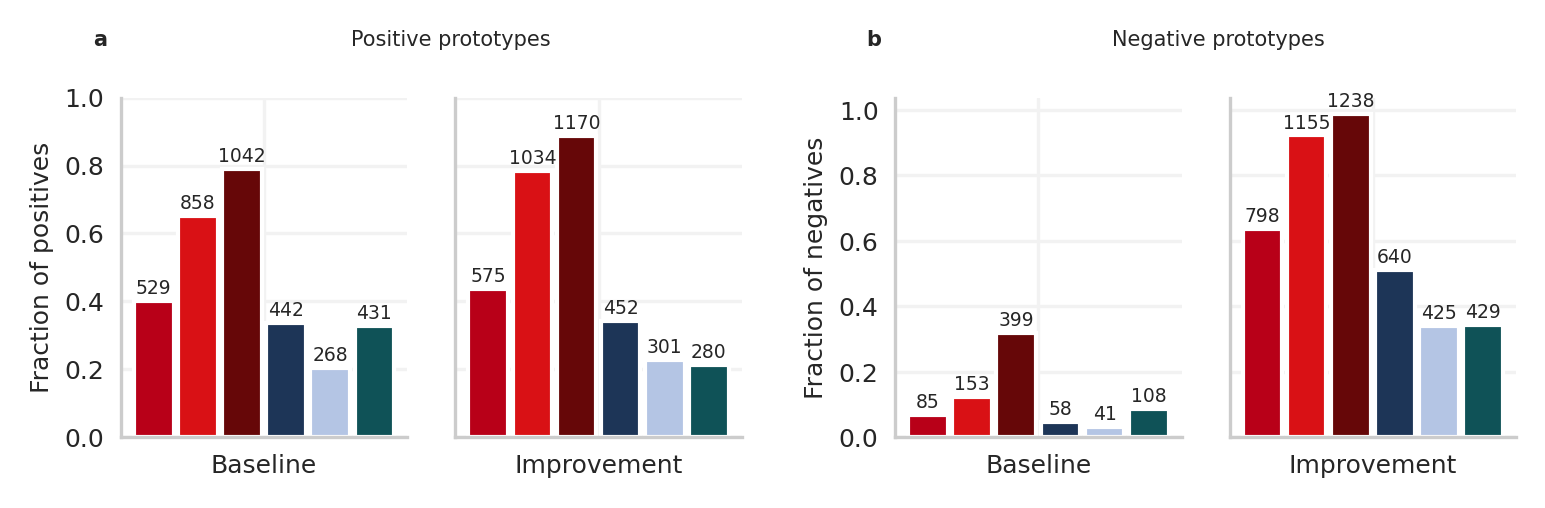

In [10]:
fig, (ax1, ax2, ax_dummy, ax3, ax4) = plt.subplots(
    nrows=1,
    ncols=5, 
    figsize=(6, 1.5),
    gridspec_kw={'width_ratios': [5, 5, 1, 5, 5]},
    dpi=300
)



width = 0.9  # the width of the bars
for ind, (means, color) in enumerate(zip(means_list, palette_models.values())):
    rects1 = ax1.bar(ind, means[0], width, color=color)
    autolabel(rects1, ax1, POS_COUNT)
    rects2 = ax2.bar(ind, means[1], width, color=color)
    autolabel(rects2, ax2, POS_COUNT)
    rects3 = ax3.bar(ind, means[2], width, color=color)
    autolabel(rects3, ax3, NEG_COUNT)
    rects4 = ax4.bar(ind, means[3], width, color=color)
    autolabel(rects4, ax4, NEG_COUNT)
        
ax1.sharey(ax2)
ax2.tick_params(labelleft=False)
ax1.set_ylim(0,1)
ax3.sharey(ax4)
ax4.tick_params(labelleft=False)

ax1.set_ylabel('Fraction of positives')
ax3.set_ylabel('Fraction of negatives')

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xticks([2.5])
ax1.set_xticklabels(['Baseline'])
ax2.set_xticklabels(['Improvement'])

ax3.set_xticklabels(['Baseline'])
ax4.set_xticklabels(['Improvement'])
ax_dummy.remove()


for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', pad=0.5)
    ax.yaxis.labelpad = 2.5

    
for i, (label, ax) in enumerate(
    zip(['a', 'b'], [ax1, ax3])
):
    ax.annotate(label, xy=(-0.05, 1.2), xycoords='axes fraction',
      fontweight='bold', va='top', ha='right')

ax1.annotate('Positive prototypes', xy=(1.5, 1.2), xycoords='axes fraction', va='top', ha='right')        
ax3.annotate('Negative prototypes', xy=(1.5, 1.2), xycoords='axes fraction', va='top', ha='right')        


        
# plt.tight_layout()
plt.show()
fig.savefig("../figures/Fig2_AnalogueGeneration.svg")


In [11]:
means_dict = {
    'HydrAMP tau=1': HydrAMP_means_1,
    'HydrAMP tau=2': HydrAMP_means_2,
    'HydrAMP tau=5': HydrAMP_means_5,
    'PepCVAE': PepCVAE_means, 
    'Basic': Basic_means,
    'Joker': joker_means,
}



joker_counts = len(results['joker_pos_discovery']), len(results['joker_pos_improvement']), \
                len(results['joker_neg_discovery']), len(results['joker_neg_improvement'])

counts_dict = {
    'HydrAMP tau=1': get_counts(results, 'HydrAMP', '1'),
    'HydrAMP tau=2': get_counts(results, 'HydrAMP', '2'),
    'HydrAMP tau=5': get_counts(results, 'HydrAMP', '5'),
    'PepCVAE': get_counts(results, 'PepCVAE', '1'), 
    'Basic': get_counts(results, 'Basic', '1'),
    'Joker': joker_counts,    
}


index = ['Positives baseline', 'Positives improvement', 'Negatives baseline', 'Negatives improvement']
df_fractions = pd.DataFrame.from_dict(means_dict)
df_fractions.index = index

df_counts = pd.DataFrame.from_dict(counts_dict)
df_counts.index = index

df_counts.to_csv('SourceData_Figure2ab_counts.csv')
df_fractions.to_csv('SourceData_Figure2ab_fractions.csv')


# Edit distance

In [12]:
pex_temp_camel = load(f'../../results/PexTempCamel_2.joblib')

In [13]:
no_analogues = [pex_temp_camel['no_analogues']['Pexiganan'], pex_temp_camel['no_analogues']['CAMEL']]
levenshtein = [pex_temp_camel['ld']['Pexiganan'], pex_temp_camel['ld']['CAMEL']]
temps = [1, 2, 5]

In [14]:
pex_count = no_analogues[0]
pex_quantiles = [np.quantile(item, [0.25, 0.50, 0.75]) for item in levenshtein[0]]

camel_count = no_analogues[1]
camel_quantiles = [np.quantile(item, [0.25, 0.50, 0.75]) for item in levenshtein[1]]



In [15]:
editdistance_dict_pex = {
    'Count': pex_count,
    '25': pex_quantiles[0],
    '50': pex_quantiles[1],
    '75': pex_quantiles[2]
}

index = ['tau=1', 'tau=2', 'tau=5']
df_pex = pd.DataFrame.from_dict(editdistance_dict_pex)
df_pex.index = index
df_pex.to_csv('SourceData_Figure2cd_Pexiganan.csv')


In [16]:
editdistance_dict_camel = {
    'Count': camel_count,
    '25': camel_quantiles[0],
    '50': camel_quantiles[1],
    '75': camel_quantiles[2]
}

index = ['tau=1', 'tau=2', 'tau=5']
df_camel = pd.DataFrame.from_dict(editdistance_dict_camel)
df_camel.index = index
df_camel.to_csv('SourceData_Figure2cd_CAMEL.csv')

In [19]:
def autolabel(rects, ax):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(np.exp(h)),
                ha='center', va='bottom')

width = 0.75
boxprops = dict(linewidth=0.5, color='black')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')

whiskerprops = dict(linewidth=0.5)
capprops =dict(linewidth=0.5, color='black')
medianprops=dict(color='black')


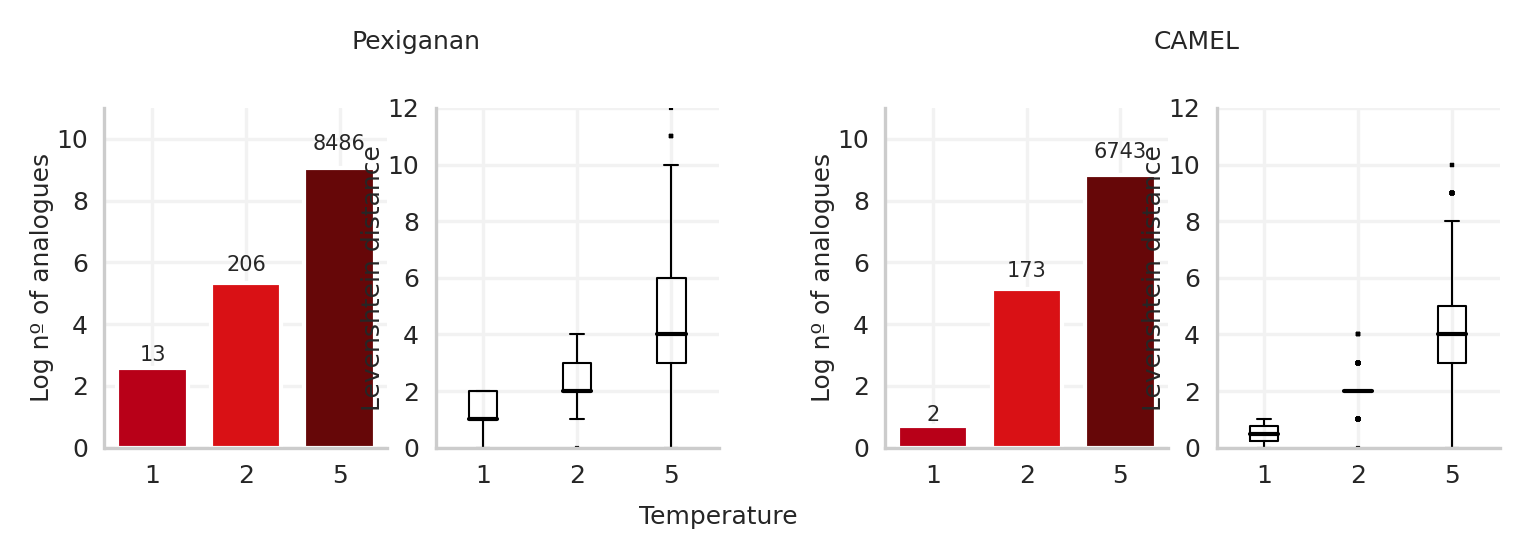

In [20]:
fig, (ax1, ax2, ax_dummy, ax3, ax4) = plt.subplots(
    nrows=1,
    ncols=5,
    figsize=(6, 1.5),
    dpi=300,
    gridspec_kw={'width_ratios': [2, 2, 0.5, 2, 2]}
)




rect = ax1.bar(
    ['1', '2', '5'],
    [np.log(x) if x != 0 else x for x in no_analogues[0]], 
    width=width, 
    color=[
        palette_models['HydrAMP τ=1'],
        palette_models['HydrAMP τ=2'],
        palette_models['HydrAMP τ=5']
    ]
)
autolabel(rect, ax=ax1)
ax1.set_title('Pexiganan', x=1.1, y=1.1)
ax2.boxplot(
    levenshtein[0],
    sym='+',
    flierprops=flierprops,
    boxprops=boxprops, 
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
)

                    
rect2 = ax3.bar(
    ['1', '2', '5'],
    [np.log(x) if x != 0 else x for x in no_analogues[1]], 
    width=width, 
    color=[
        palette_models['HydrAMP τ=1'],
        palette_models['HydrAMP τ=2'],
        palette_models['HydrAMP τ=5']
    ]
)

autolabel(rect2, ax=ax3)

ax3.set_title('CAMEL', x=1.1, y=1.1)
ax4.boxplot(levenshtein[1], 
            sym='+',
            flierprops=flierprops,
            boxprops=boxprops, 
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
           )

ax2.set_xticklabels(temps)
ax4.set_xticklabels(temps)

for ax in ax1, ax3:
    ax.set_ylabel('Log nº of analogues')

for ax in ax2, ax4:
    ax.set_ylabel('Levenshtein distance')
    
ax2.set_xlabel('Temperature', x=1)

ax1.set_ylim(0, 11)
ax3.set_ylim(0, 11)


ax2.set_ylim(0, 12)
ax4.set_ylim(0, 12)

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis='both', which='major', pad=0.5)
    ax.yaxis.labelpad = 0.5

ax_dummy.remove()
# ax2.set_yticklabels(range(0, 23, 3))
# ax4.set_yticklabels(range(0, 16, 3))

# fig.tight_layout()
plt.show()
fig.savefig("../../figures/Fig2_EditDistance.svg")


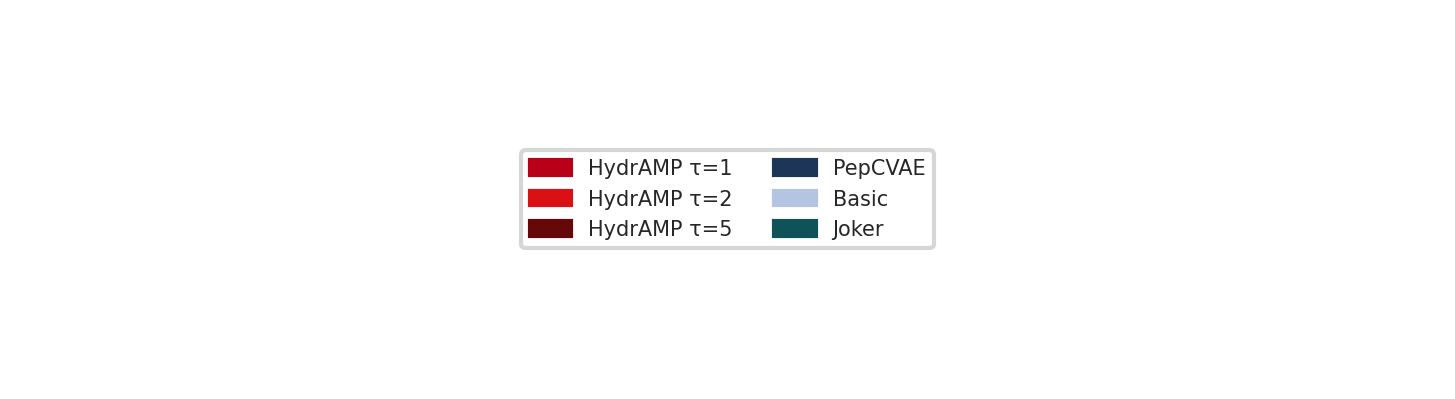

In [21]:
fig, ax1= plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(6, 1.5),
    dpi=300,
)

patches = [mpatches.Patch(color=color, label=label) for label, color in palette_models.items()]
plt.legend(handles=patches, ncol=2,loc='center')

# fig.tight_layout()
plt.axis('off')
plt.show()
fig.savefig("../../figures/Fig2_Legend.svg")
